# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san policarpo
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | zheleznodorozhnyy
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | umm durman
City not found. Skipping...
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | makakilo city
Processing Record 21 of S

Processing Record 34 of Set 4 | sao miguel do araguaia
Processing Record 35 of Set 4 | raga
Processing Record 36 of Set 4 | forrest city
Processing Record 37 of Set 4 | ocos
Processing Record 38 of Set 4 | sosnovo-ozerskoye
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | karpathos
Processing Record 41 of Set 4 | egvekinot
Processing Record 42 of Set 4 | corinth
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | okha
Processing Record 47 of Set 4 | ziarat
Processing Record 48 of Set 4 | sinnamary
Processing Record 49 of Set 4 | vestmanna
Processing Record 0 of Set 5 | daru
Processing Record 1 of Set 5 | matay
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | tautira
Processing Record 5 of Set 5 | koslan
Processing Record 6 of Set 5 | gravdal
Processing Record 7

Processing Record 29 of Set 8 | bonthe
Processing Record 30 of Set 8 | san carlos
Processing Record 31 of Set 8 | alakurtti
Processing Record 32 of Set 8 | karratha
Processing Record 33 of Set 8 | saint-felicien
Processing Record 34 of Set 8 | husavik
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | loa janan
Processing Record 37 of Set 8 | bethanien
Processing Record 38 of Set 8 | shawnee
Processing Record 39 of Set 8 | rio grande
Processing Record 40 of Set 8 | qandala
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | vung tau
Processing Record 43 of Set 8 | tulagi
Processing Record 44 of Set 8 | nangomba
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 8 | belyy yar
Processing Record 48 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 8 | dong hoi
Processing Record 0 of Set 9 | ereymentau
Processing Recor

Processing Record 19 of Set 12 | santa rosalia
Processing Record 20 of Set 12 | ambulu
Processing Record 21 of Set 12 | beringovskiy
Processing Record 22 of Set 12 | san marcos
Processing Record 23 of Set 12 | scarborough
Processing Record 24 of Set 12 | cocula
Processing Record 25 of Set 12 | mogadishu
Processing Record 26 of Set 12 | skibbereen
Processing Record 27 of Set 12 | oil city
Processing Record 28 of Set 12 | hastings
Processing Record 29 of Set 12 | san ramon
Processing Record 30 of Set 12 | adre
Processing Record 31 of Set 12 | kalaleh
Processing Record 32 of Set 12 | katakwi
Processing Record 33 of Set 12 | darhan
Processing Record 34 of Set 12 | waingapu
Processing Record 35 of Set 12 | shu
Processing Record 36 of Set 12 | harindanga
Processing Record 37 of Set 12 | kutum
Processing Record 38 of Set 12 | varca
Processing Record 39 of Set 12 | kapuskasing
Processing Record 40 of Set 12 | quibdo
Processing Record 41 of Set 12 | sao mateus
Processing Record 42 of Set 12 | k

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san policarpo,12.1791,125.5072,26.92,87,100,7.42,PH,1683061816
1,hermanus,-34.4187,19.2345,13.22,84,0,1.29,ZA,1683061816
2,vaini,-21.2000,-175.2000,24.99,59,100,11.49,TO,1683061816
3,cape town,-33.9258,18.4232,16.88,73,0,3.13,ZA,1683061755
4,georgetown,5.4112,100.3354,26.96,89,20,0.00,MY,1683061619


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san policarpo,12.1791,125.5072,26.92,87,100,7.42,PH,1683061816
1,hermanus,-34.4187,19.2345,13.22,84,0,1.29,ZA,1683061816
2,vaini,-21.2000,-175.2000,24.99,59,100,11.49,TO,1683061816
3,cape town,-33.9258,18.4232,16.88,73,0,3.13,ZA,1683061755
4,georgetown,5.4112,100.3354,26.96,89,20,0.00,MY,1683061619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

<IPython.core.display.Javascript object>


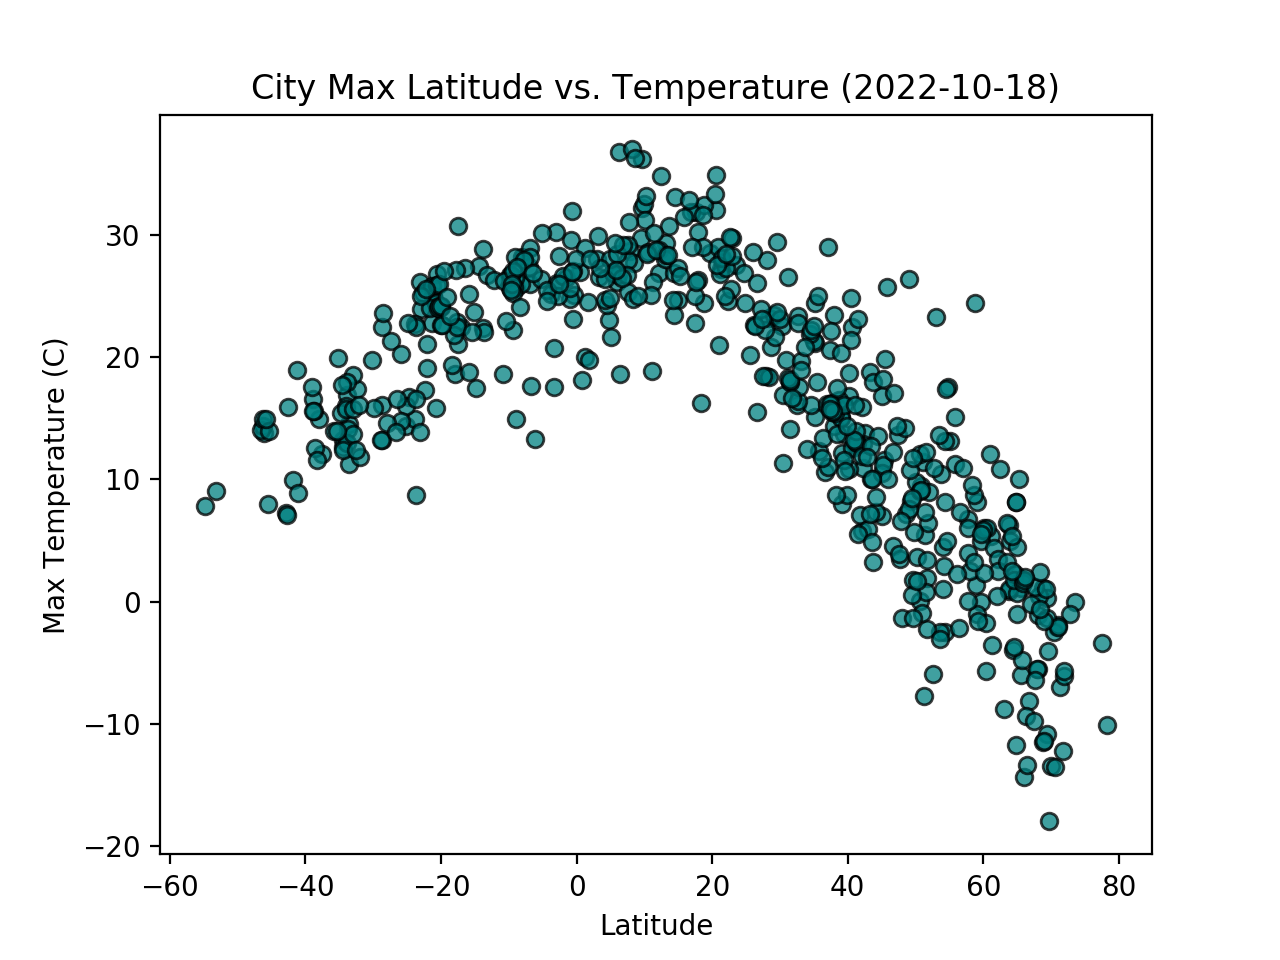

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

<IPython.core.display.Javascript object>


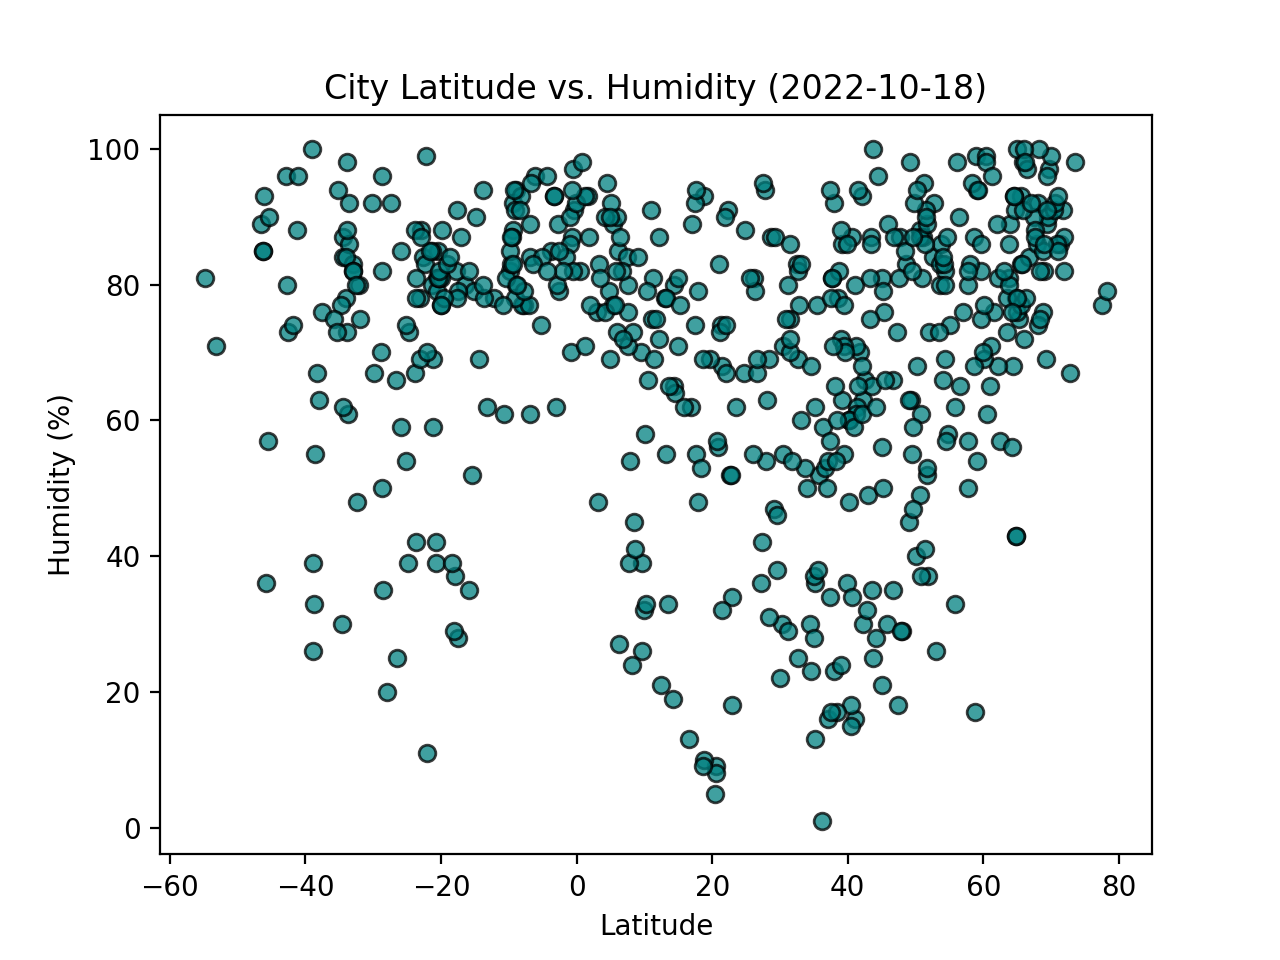

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

<IPython.core.display.Javascript object>


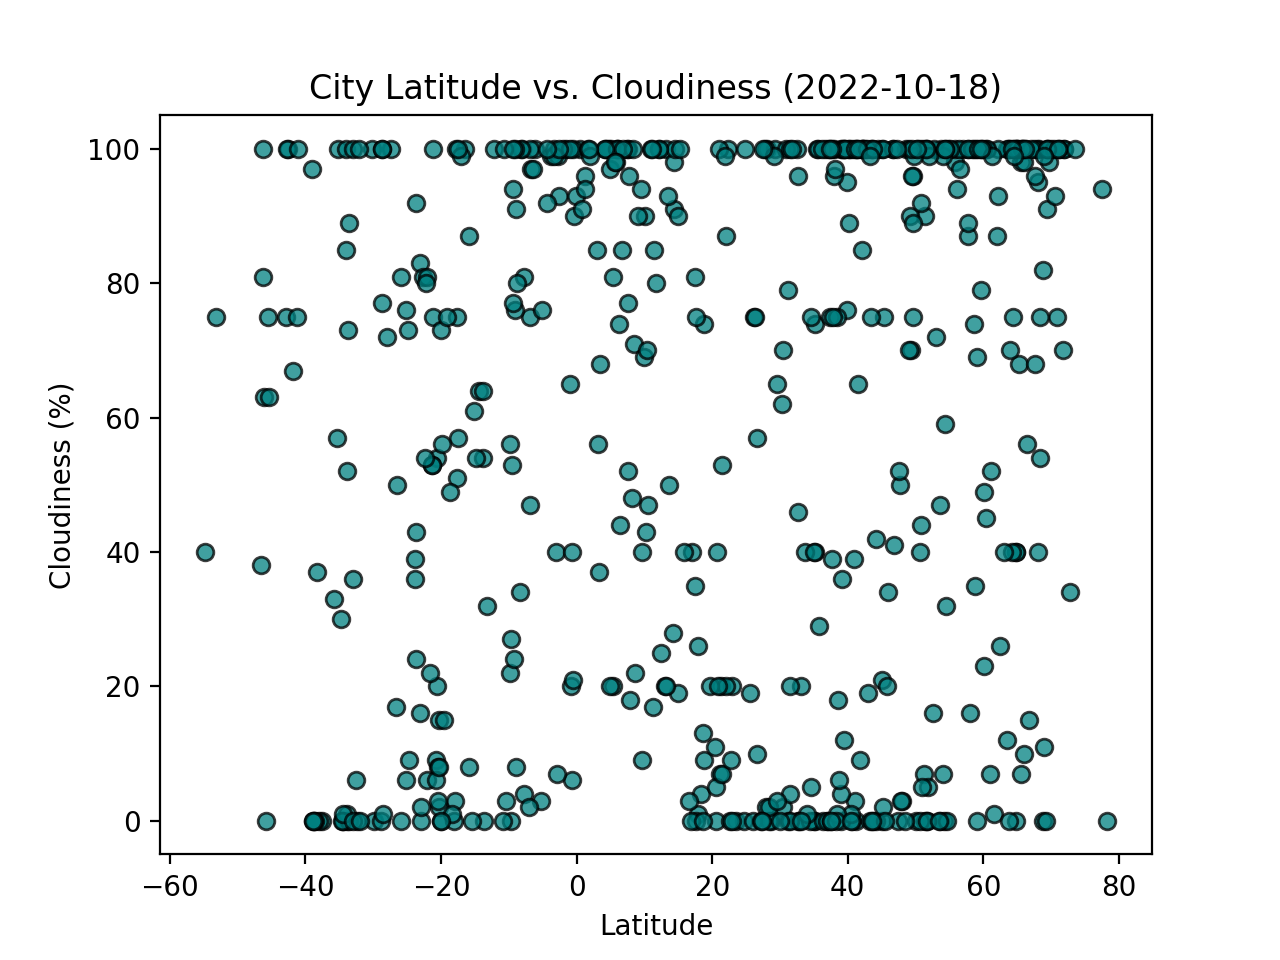

In [11]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


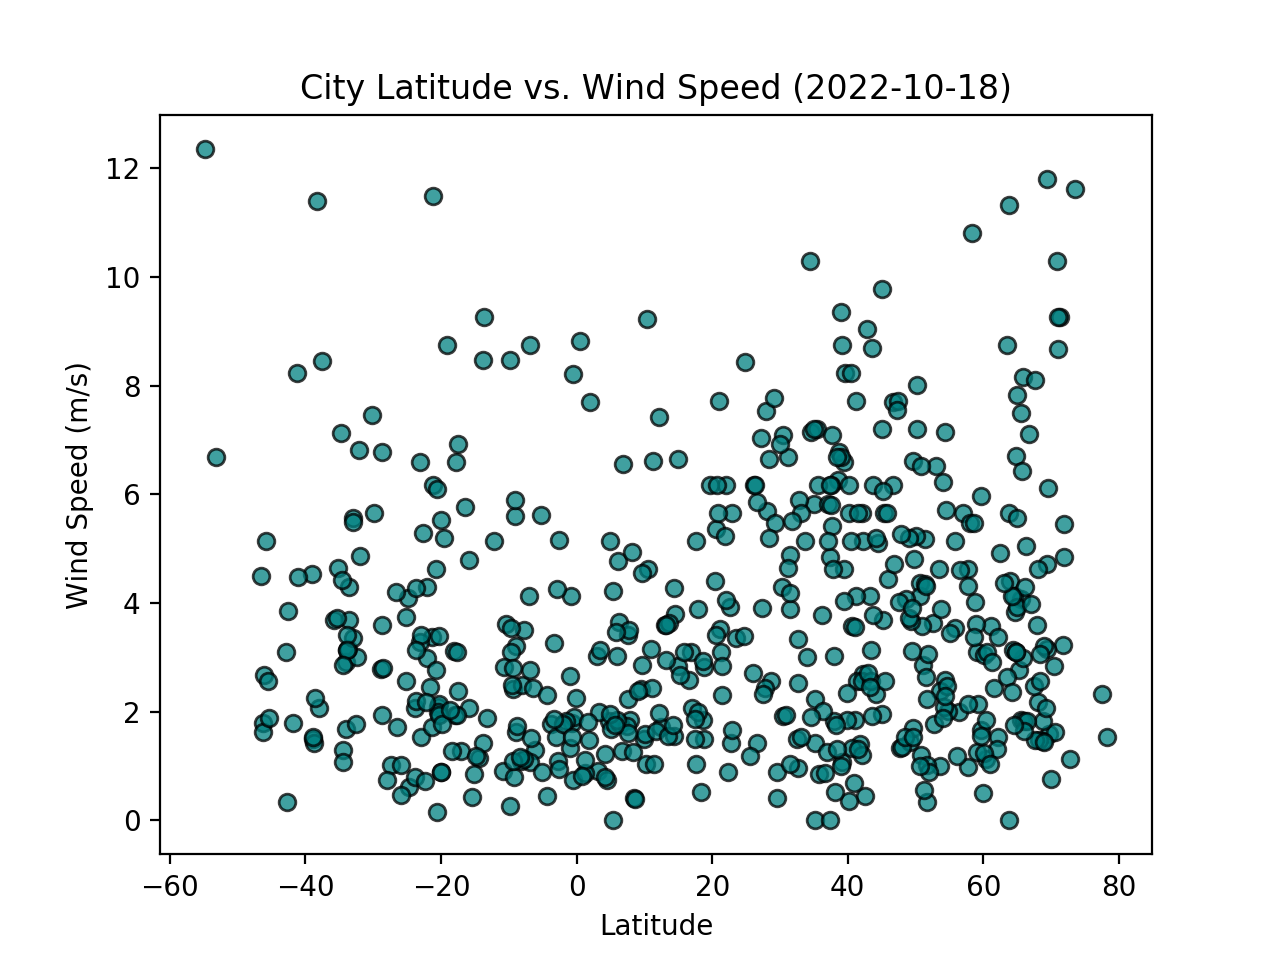

In [12]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def Lin_reg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}')
    return regress_values, line_eq


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask_northern_lat = city_data_df['Lat'] >= 0

northern_hemi_df = city_data_df.loc[mask_northern_lat,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san policarpo,12.1791,125.5072,26.92,87,100,7.42,PH,1683061816
4,georgetown,5.4112,100.3354,26.96,89,20,0.00,MY,1683061619
5,los llanos de aridane,28.6585,-17.9182,20.86,87,0,2.57,ES,1683061817
6,katsuura,35.1333,140.3000,15.12,62,74,1.42,JP,1683061817
7,norman wells,65.2820,-126.8329,10.01,75,68,2.76,CA,1683061817


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask_southern_lat = city_data_df['Lat'] < 0

southern_hemi_df = city_data_df.loc[mask_southern_lat,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,13.22,84,0,1.29,ZA,1683061816
2,vaini,-21.2000,-175.2000,24.99,59,100,11.49,TO,1683061816
3,cape town,-33.9258,18.4232,16.88,73,0,3.13,ZA,1683061755
8,tuatapere,-46.1333,167.6833,13.79,93,63,2.67,NZ,1683061818
9,port alfred,-33.5906,26.8910,14.54,92,89,4.29,ZA,1683061818


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
#regress_values = Lin_reg(city_data_df['Lat'],city_data_df['Wind Speed'])
#regress_values

The r-value is: 0.11374824314072346


(City_ID
 0      3.537377
 1      3.159256
 2      3.266520
 3      3.163256
 4      3.482459
          ...   
 559    3.992827
 560    3.821927
 561    3.402944
 562    3.922186
 563    3.310069
 Name: Lat, Length: 564, dtype: float64,
 'y = 0.01x + 3.44')

The r-value is: -0.8828910477012712


<IPython.core.display.Javascript object>


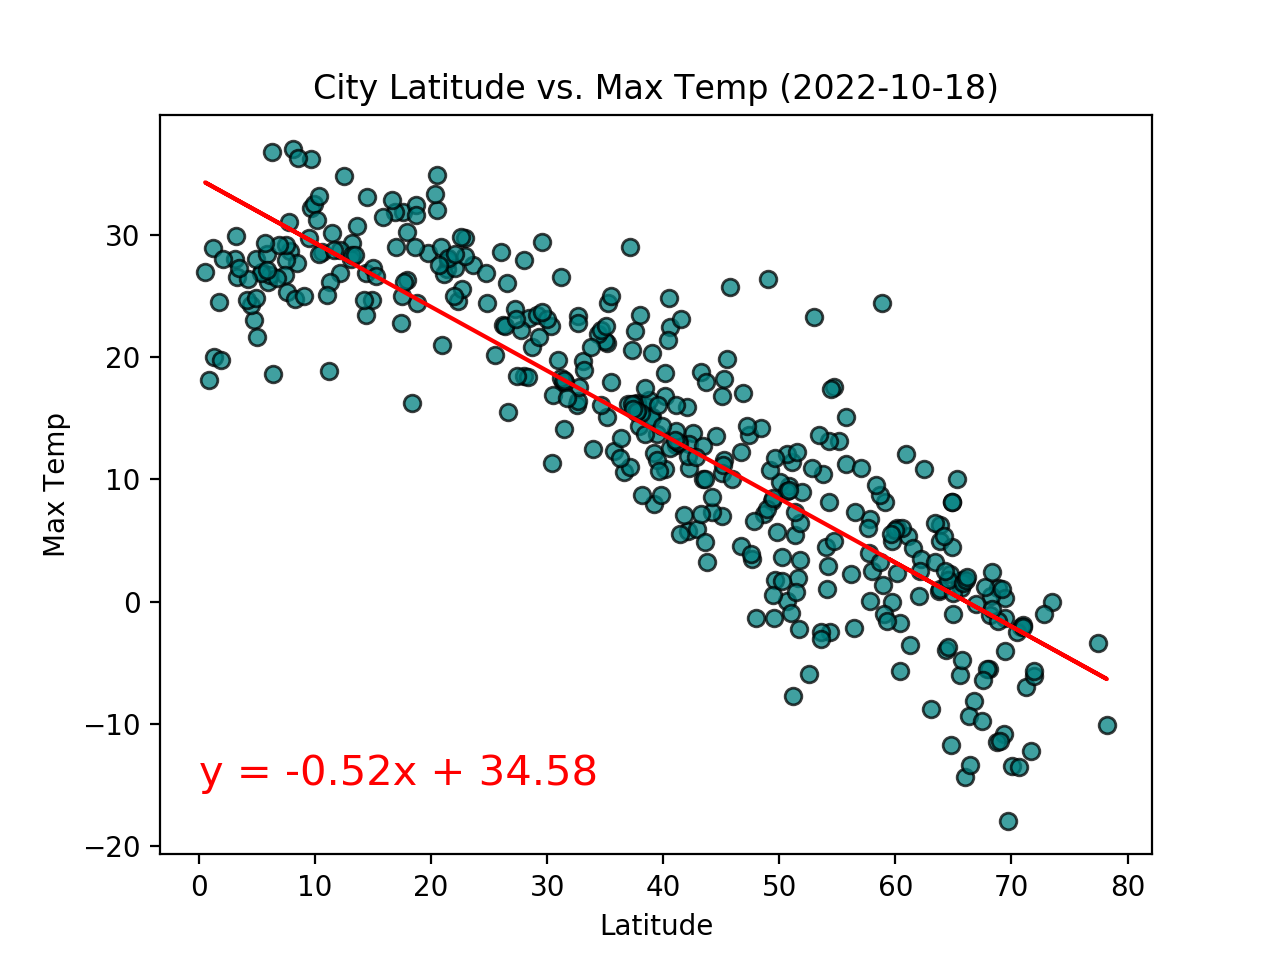

<function matplotlib.pyplot.show(*args, **kw)>

In [17]:
# Linear regression on Northern Hemisphere
regress_values, line_eq = Lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show


The r-value is: 0.7884859898573767


<IPython.core.display.Javascript object>


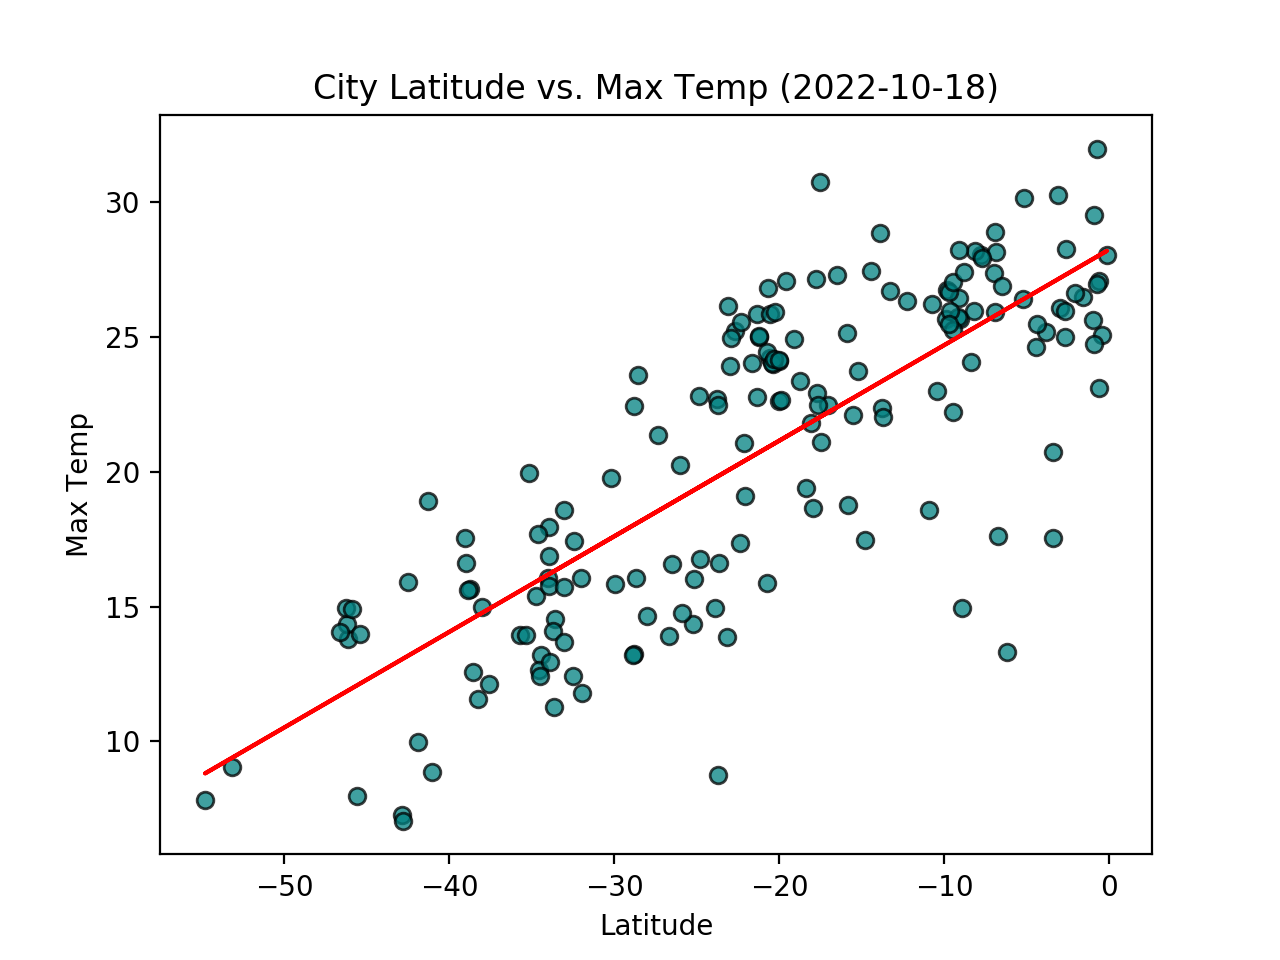

<function matplotlib.pyplot.show(*args, **kw)>

In [18]:
# Linear regression on Southern Hemisphere
regress_values_south, line_eq_south = Lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(southern_hemi_df['Lat'],regress_values_south,"r-")
plt.annotate(line_eq_south,(-25,5),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show

**Discussion about the linear relationship:** From the northern and southern hemisphere plots above we see that there is a trend where the closer a city is to a latitude of 0 (i.e. the equator) the higher the max temp for that city will be.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2288347287043706


<IPython.core.display.Javascript object>


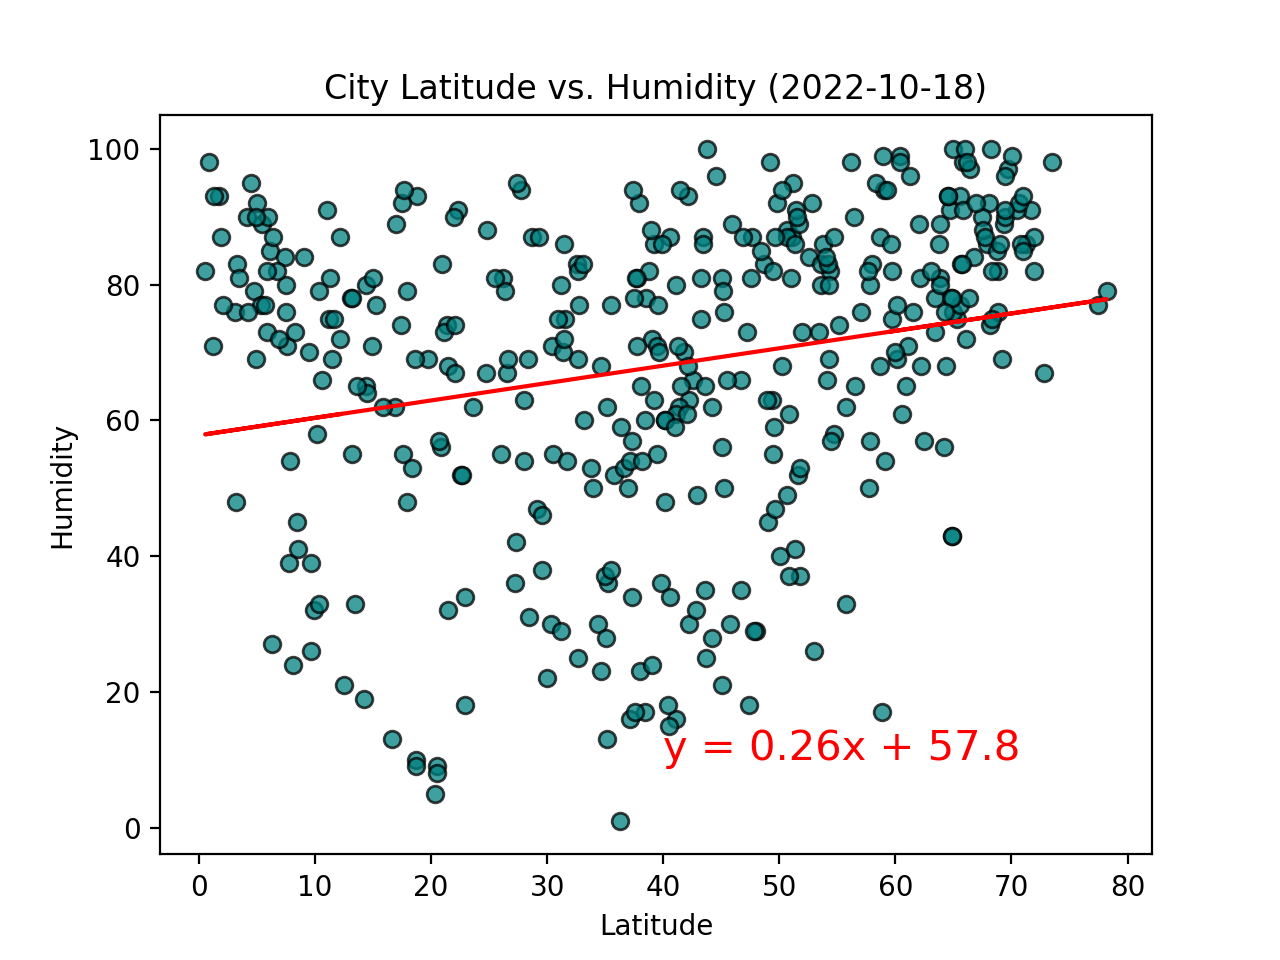

<function matplotlib.pyplot.show(*args, **kw)>

In [19]:
# Northern Hemisphere
regress_values, line_eq = Lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show

The r-value is: 0.2142679996280025


<IPython.core.display.Javascript object>


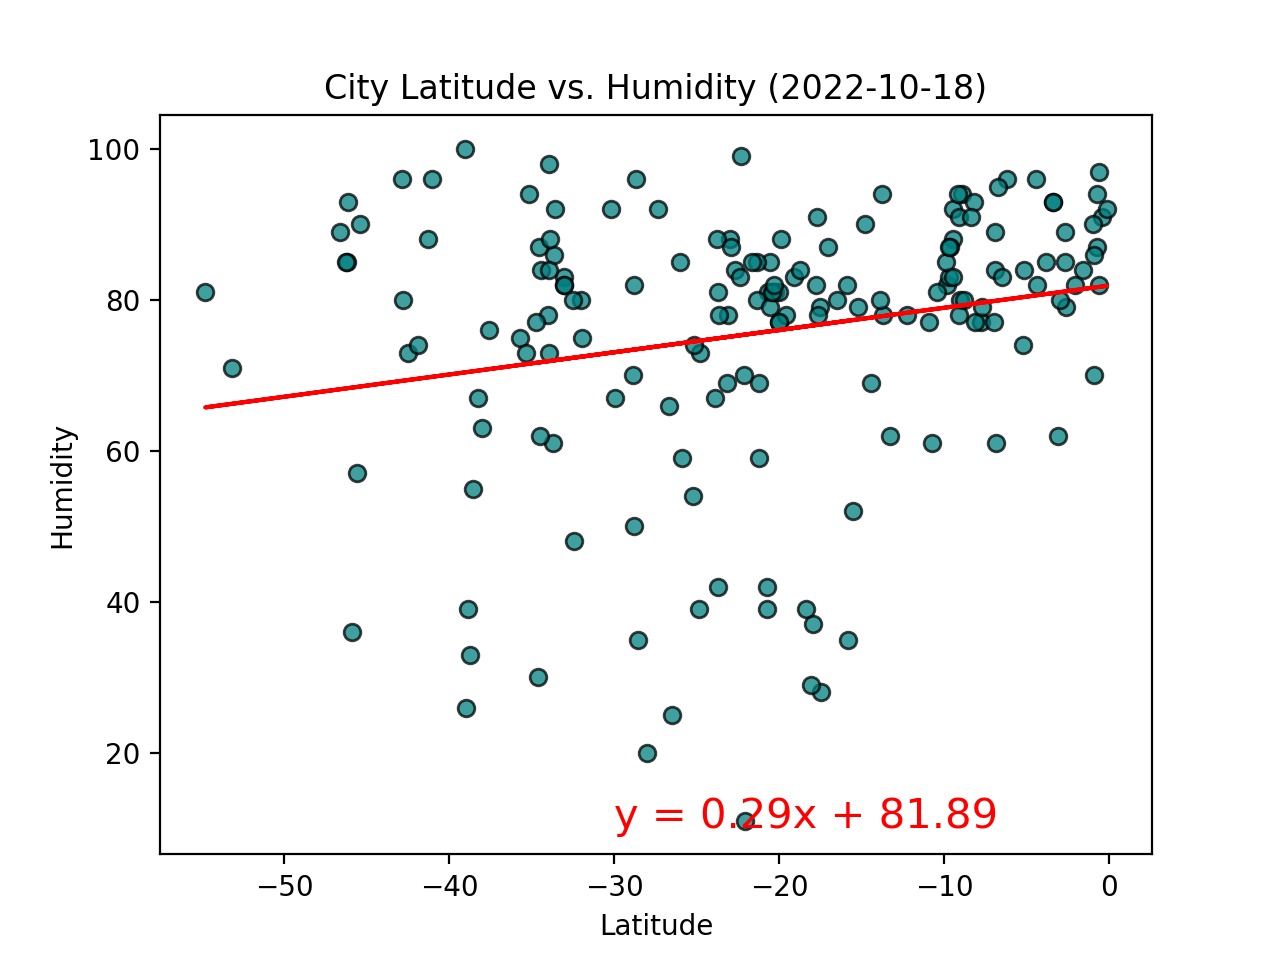

<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
# Southern Hemisphere
regress_values_south, line_eq_south = Lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(southern_hemi_df['Lat'],regress_values_south,"r-")
plt.annotate(line_eq_south,(-30,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show

**Discussion about the linear relationship:** From the above graphs we see that cities in the southern and northern hemispheres do are extremely with respect to humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10048044629514086


<IPython.core.display.Javascript object>


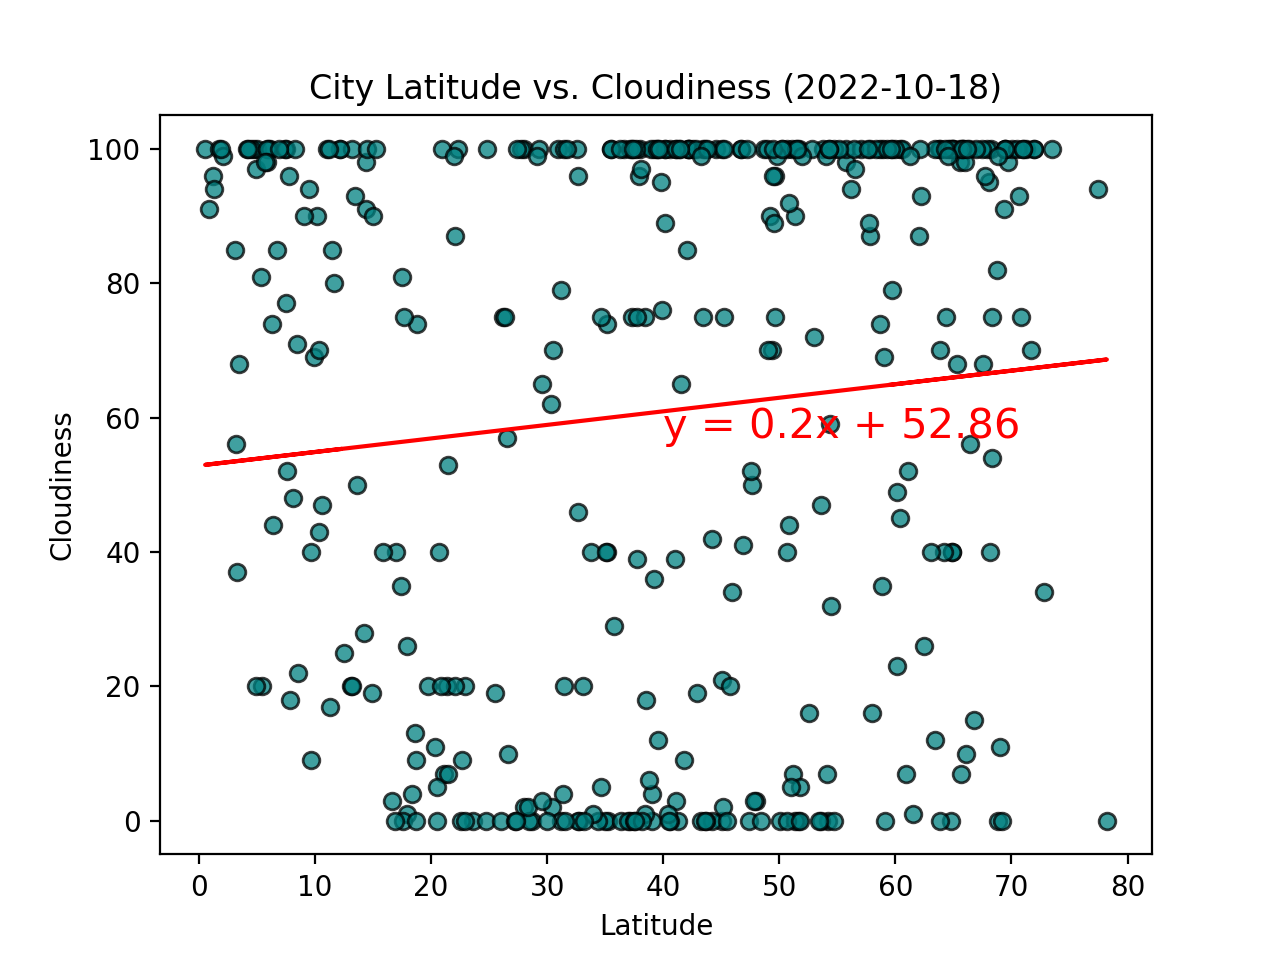

<function matplotlib.pyplot.show(*args, **kw)>

In [21]:
# Northern Hemisphere
regress_values, line_eq = Lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,57),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show

The r-value is: 0.16963125688124525


<IPython.core.display.Javascript object>


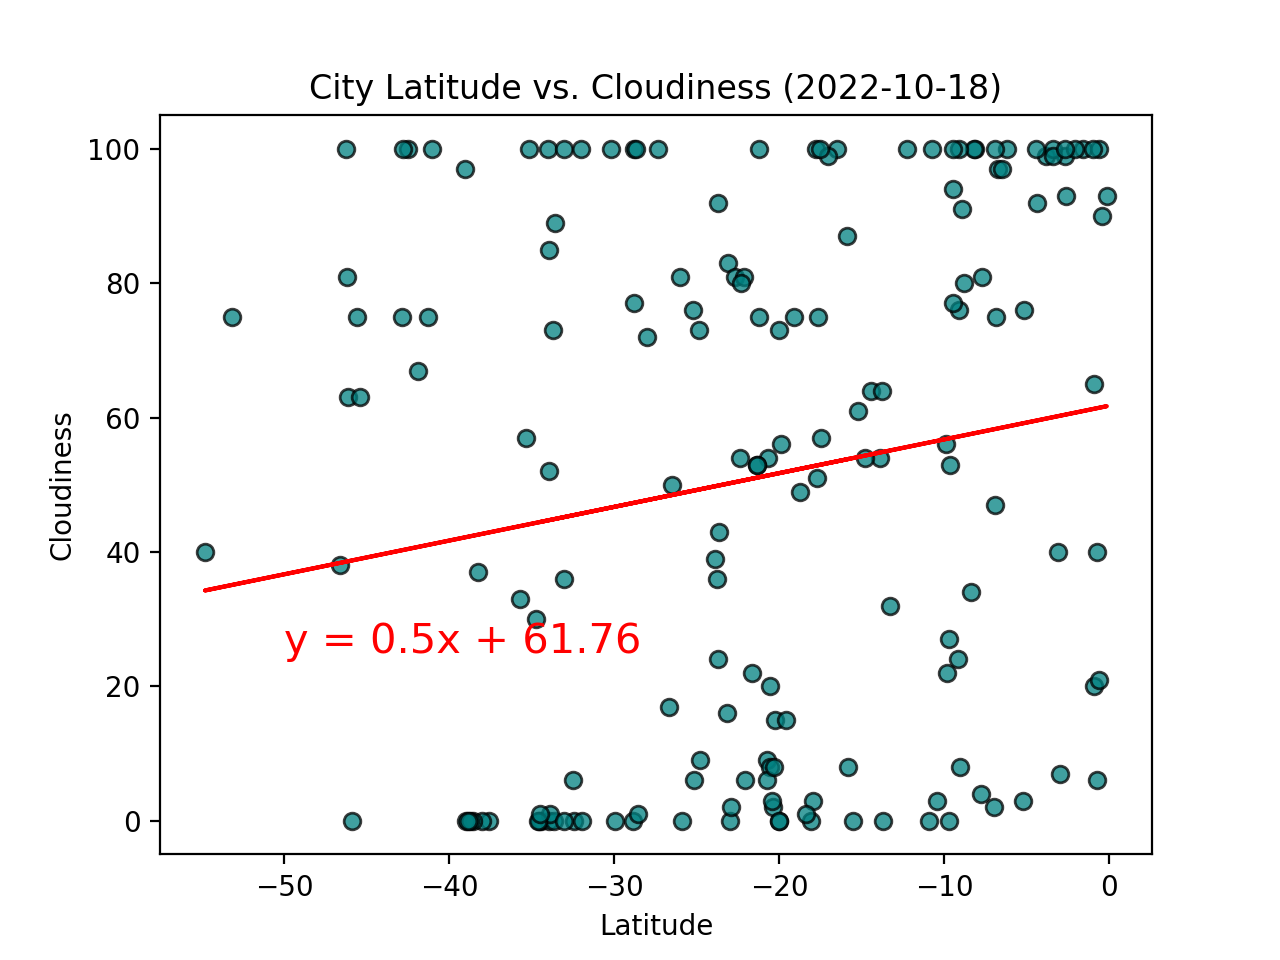

<function matplotlib.pyplot.show(*args, **kw)>

In [22]:
# Southern Hemisphere
regress_values_south, line_eq_south = Lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(southern_hemi_df['Lat'],regress_values_south,"r-")
plt.annotate(line_eq_south,(-50,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show

**Discussion about the linear relationship:** We can see that there is little correlation between the latitude of a city and the cloudiness of that city. Both the southern and northern hemispheres show very similar patterns for cloudiness with cities in the northern hemisphere having a slightly higher chance of being cloudier.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13830560745169806


<IPython.core.display.Javascript object>


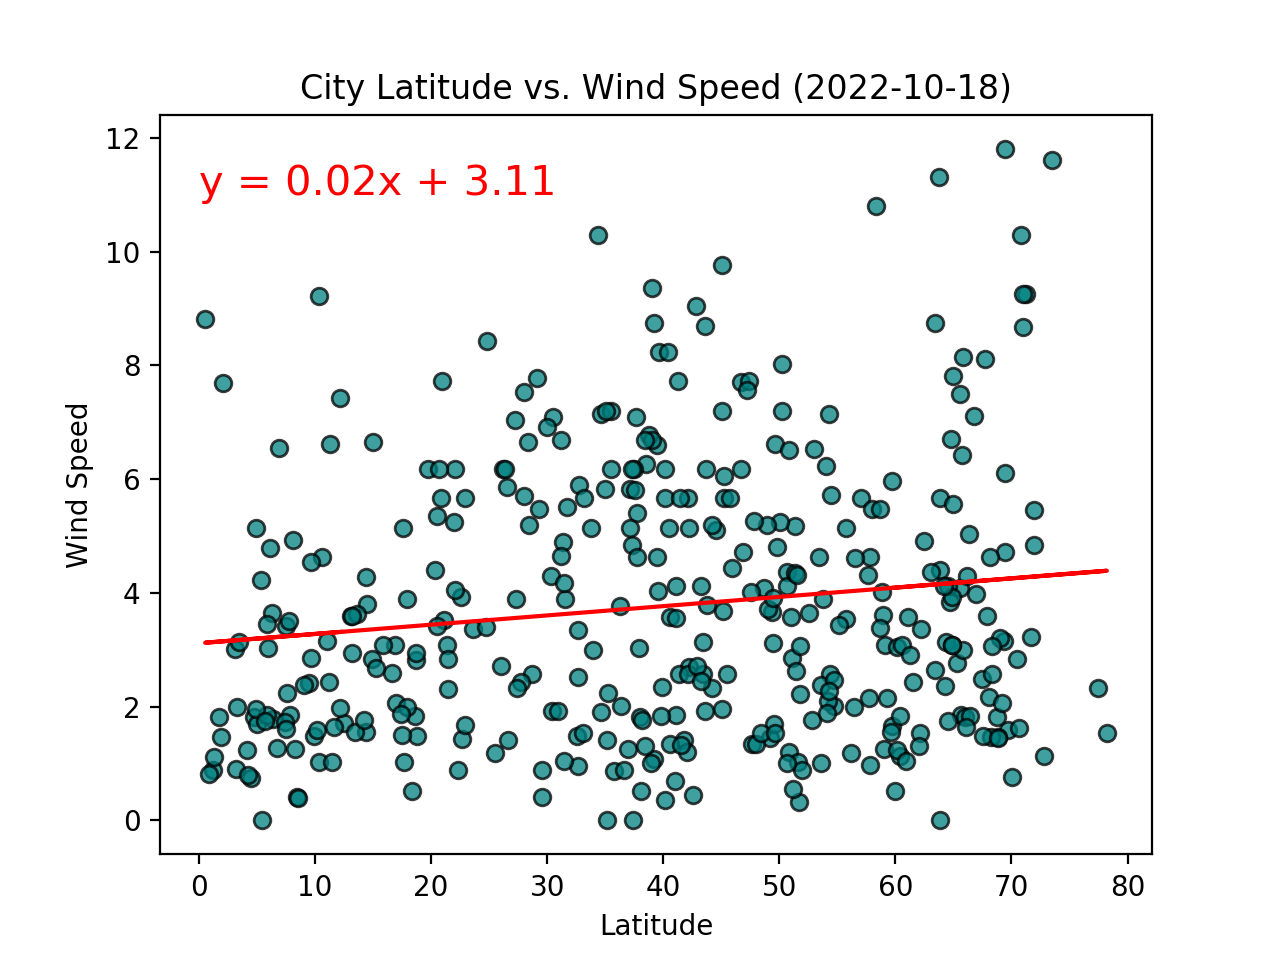

<function matplotlib.pyplot.show(*args, **kw)>

In [27]:
# Northern Hemisphere
regress_values, line_eq = Lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,11),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show

The r-value is: -0.2058225255162064


<IPython.core.display.Javascript object>


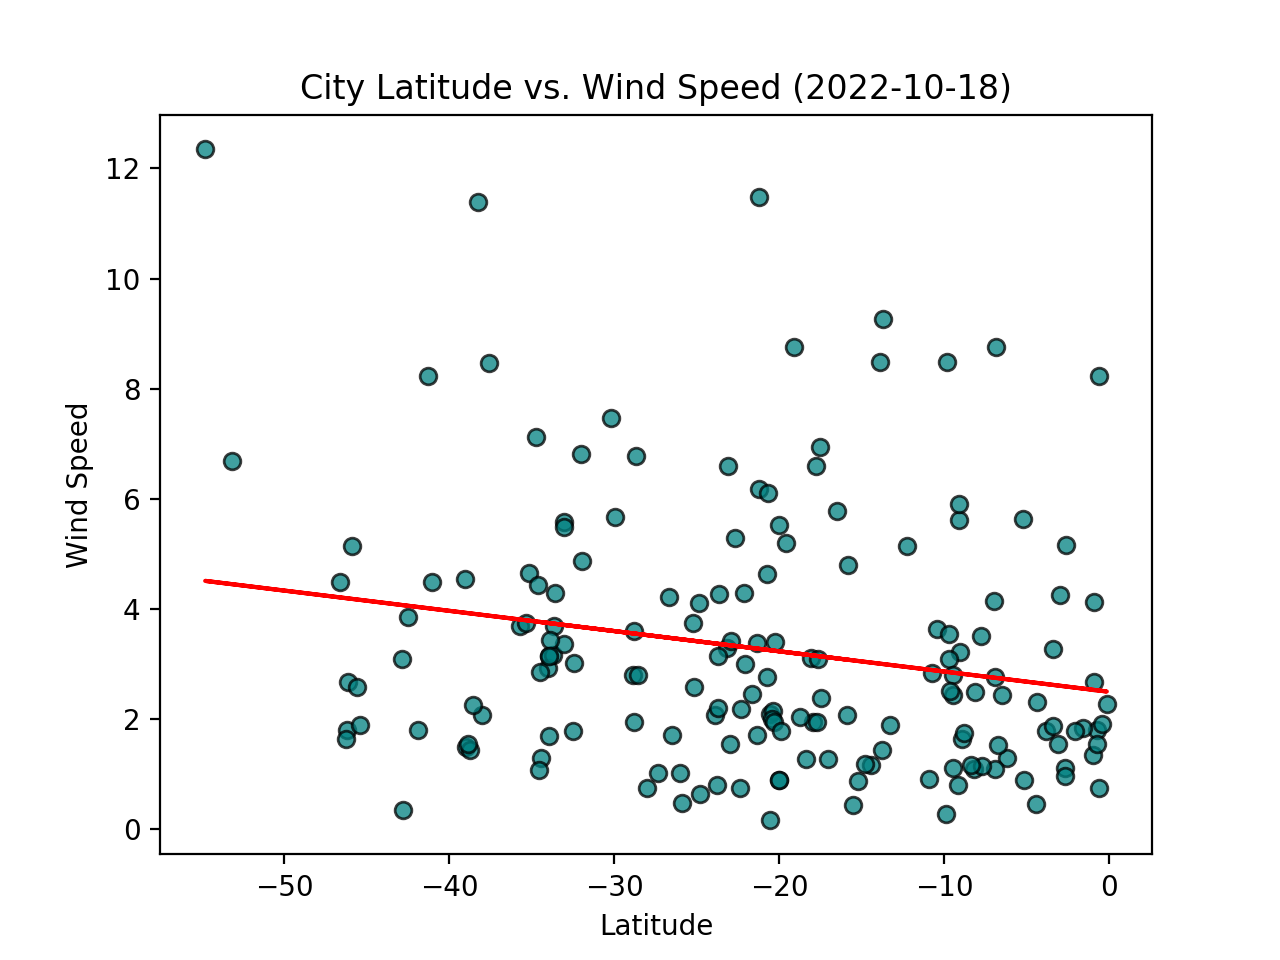

<function matplotlib.pyplot.show(*args, **kw)>

In [28]:
# Southern Hemisphere
regress_values_south, line_eq_south = Lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker="o", facecolors="teal", edgecolors="black", alpha=0.75)

plt.plot(southern_hemi_df['Lat'],regress_values_south,"r-")
plt.annotate(line_eq_south,(-25,15),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show

**Discussion about the linear relationship:** By graphing wind speed vs latitude we see that, although the correlation is not that strong for either hemisphere, you are likelier to get lower wind speeds with cities near the equator. Also as we lookat cities further away we see higher wind speeds in both the northern or southern hemisphere.